# Medical Diagnosis Classification

### Keras: Early Stopping, Dropout Layers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('./data/cancer_classification.csv')

### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


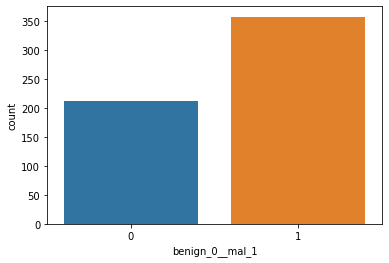

In [6]:
sns.countplot(x='benign_0__mal_1', data=df);

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

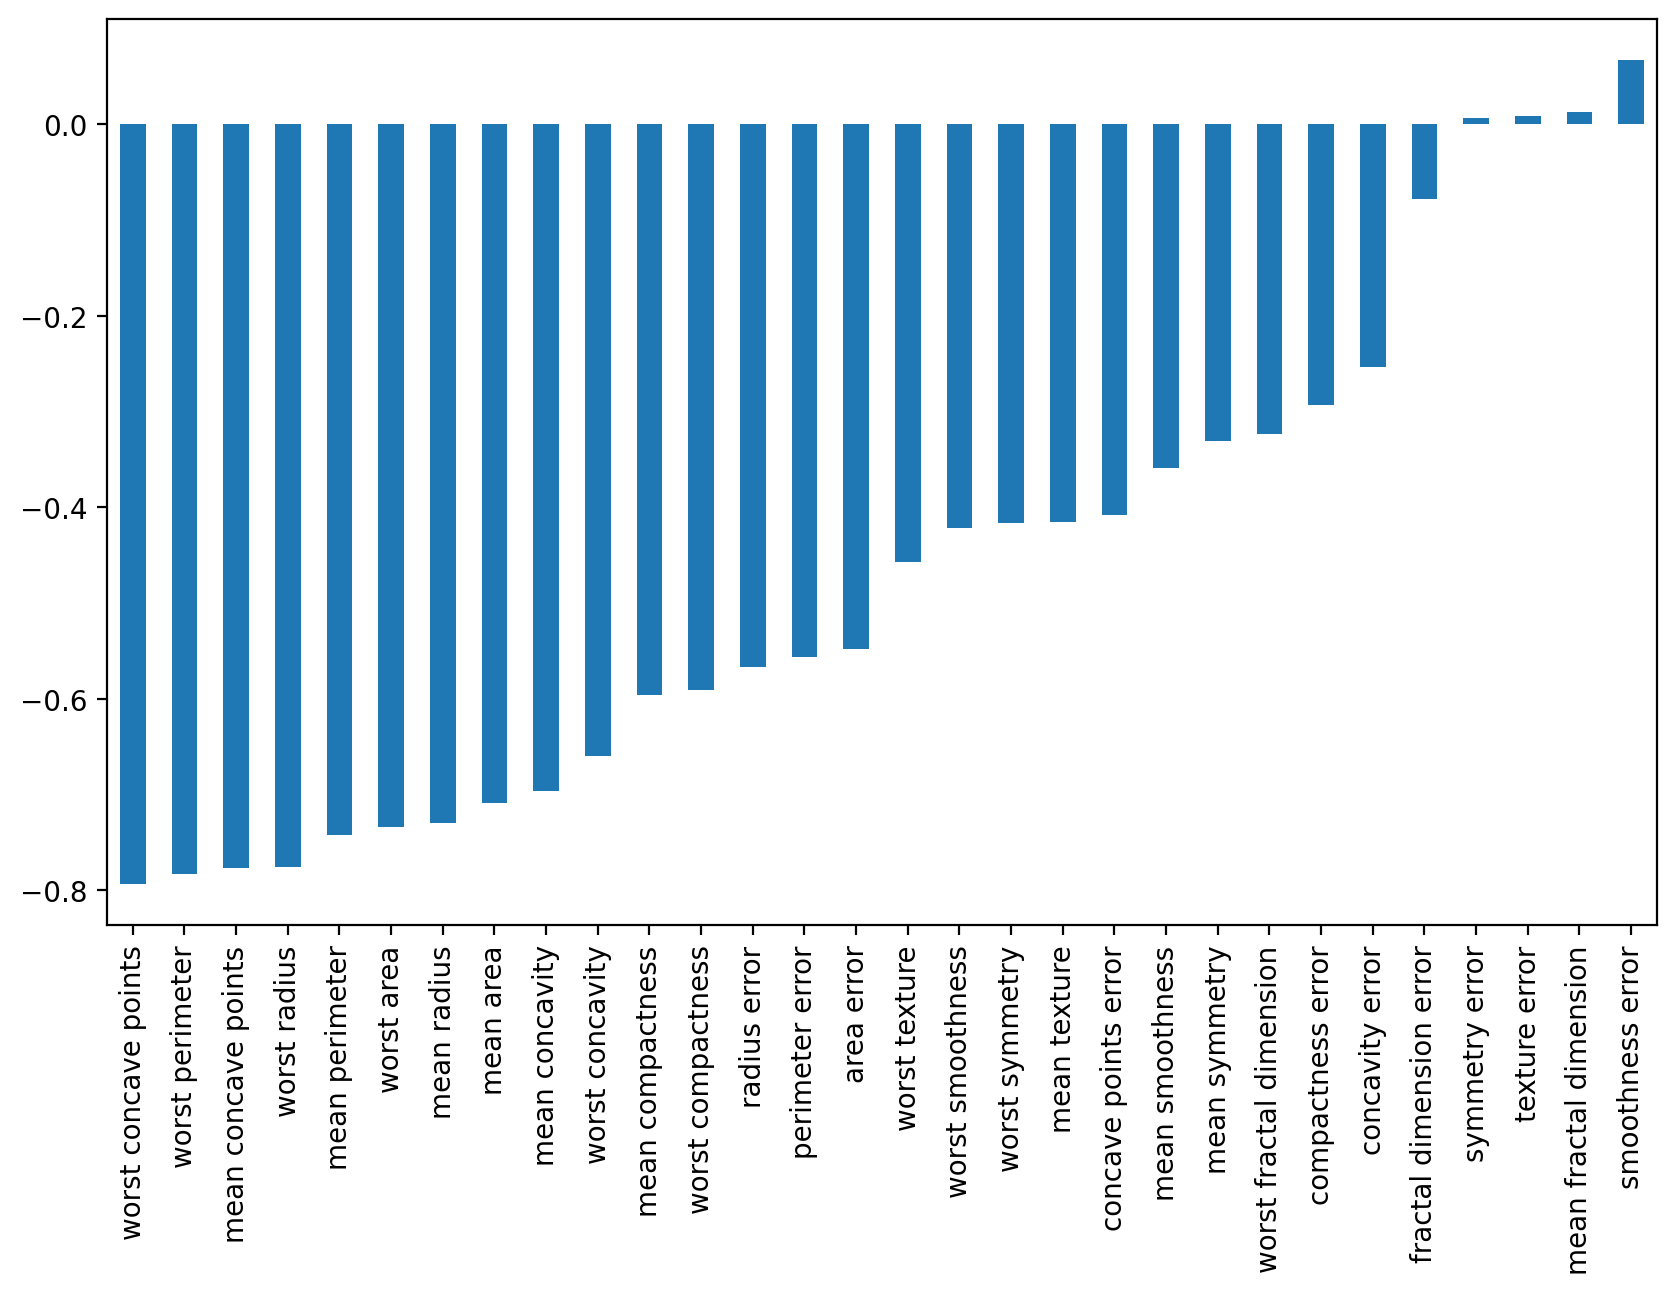

In [15]:
plt.figure(figsize=(10,6), dpi=200)
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

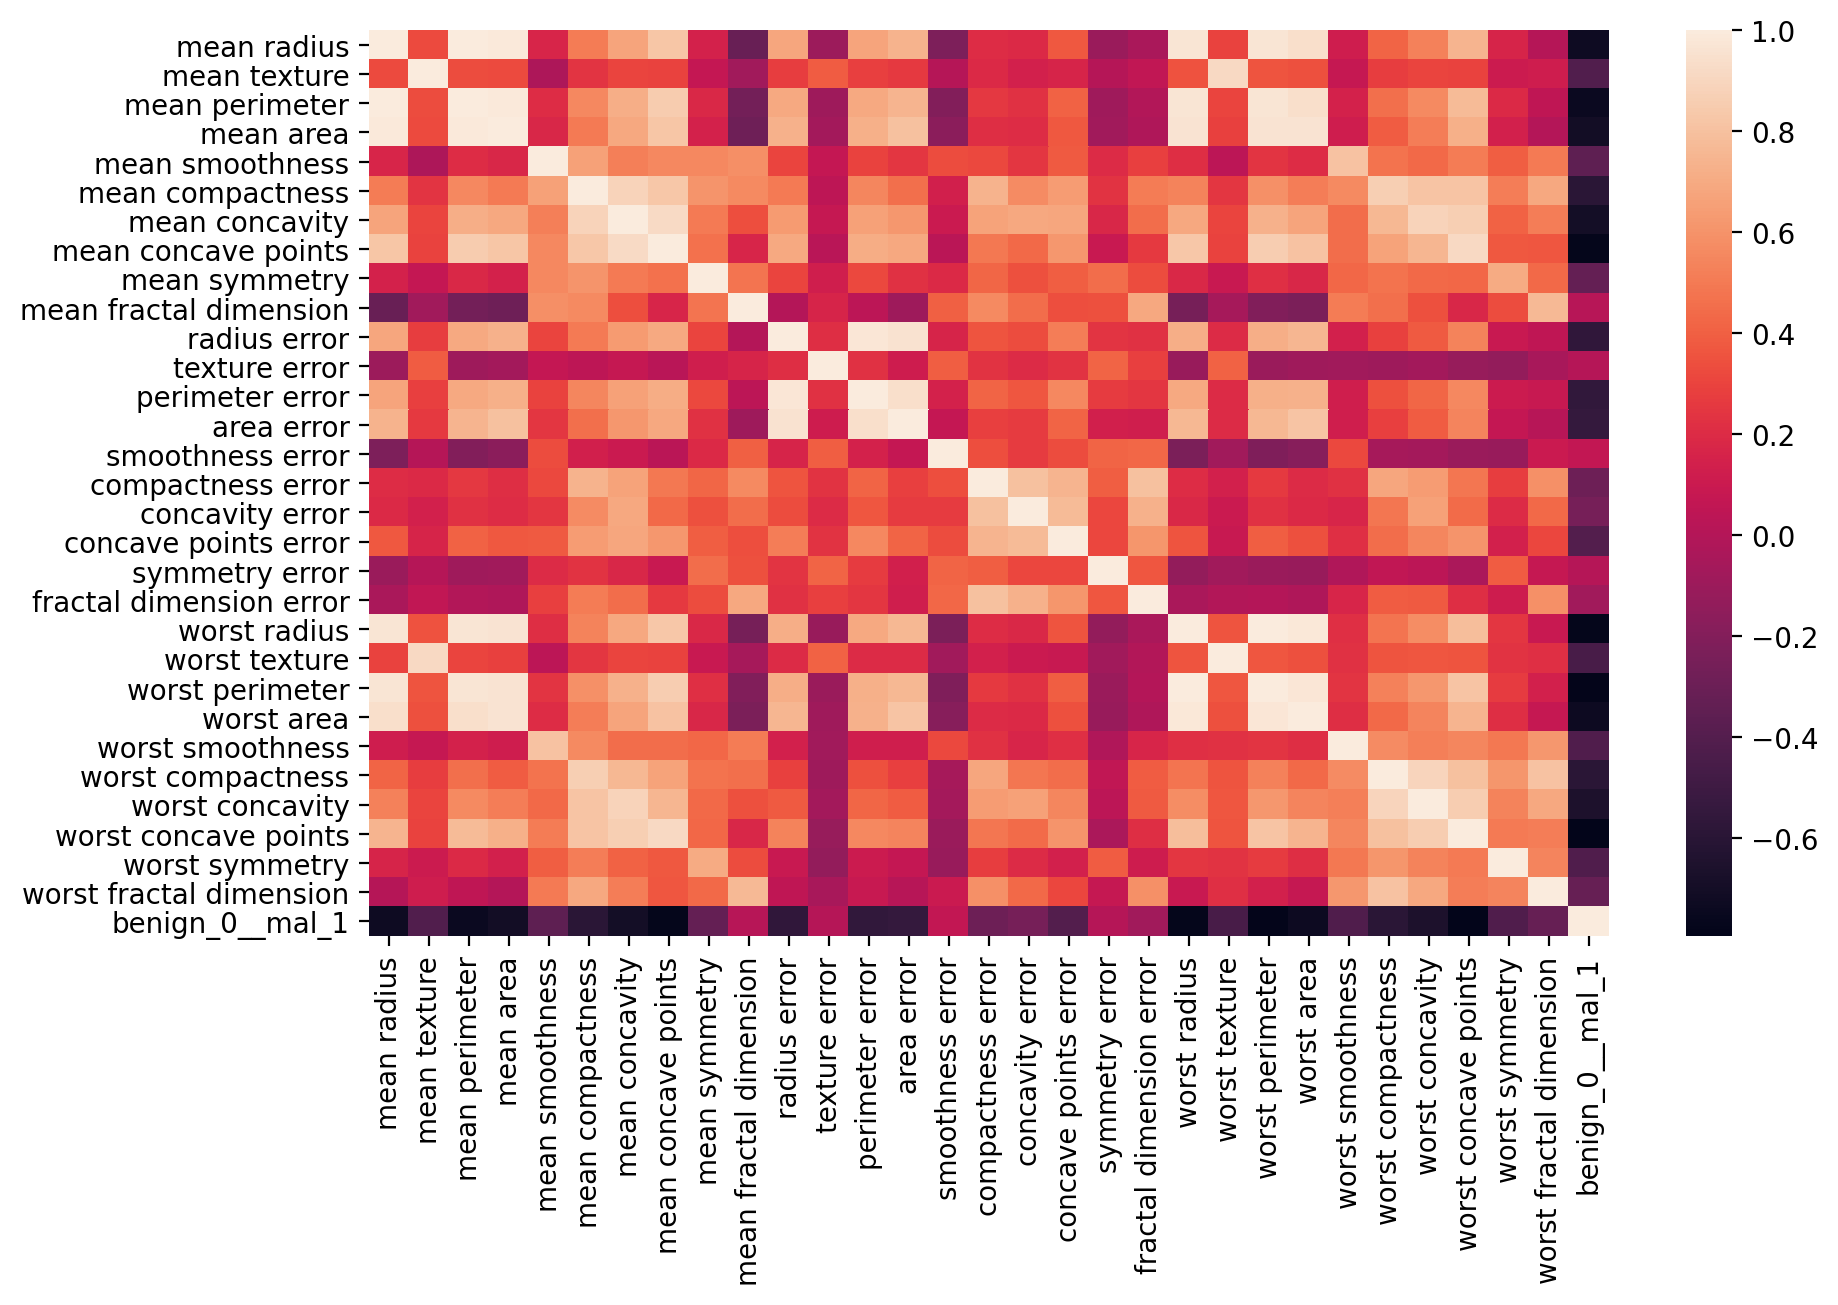

In [12]:
plt.figure(figsize=(10,6), dpi=200)
sns.heatmap(df.corr());

### Prepare the Data for Modeling

In [13]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

### Building the Neural Network for Classification

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [26]:
# initialize the model
model = Sequential()

# add layers to the model
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,
          epochs=600,
          validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 3s 63ms/step - loss: 0.7002 - val_loss: 0.6856
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6719 - val_loss: 0.6657
Epoch 3/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6580 - val_loss: 0.6416
Epoch 4/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6291 - val_loss: 0.6116
Epoch 5/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5951 - val_loss: 0.5755
Epoch 6/600
14/14 [==============================] - 0s 19ms/step - loss: 0.5584 - val_loss: 0.5343
Epoch 7/600
14/14 [==============================] - 0s 18ms/step - loss: 0.5231 - val_loss: 0.4883
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4630 - val_loss: 0.4397
Epoch 9/600
14/14 [==============================] - 0s 15ms/step - loss: 0.4286 - val_loss: 0.3931
Epoch 10/600
14/14 [==============================] - 0s 14ms/step - loss: 0.3749 - val_loss: 0.3496


Epoch 163/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0340 - val_loss: 0.1332
Epoch 164/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0311 - val_loss: 0.1394
Epoch 165/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0370 - val_loss: 0.1353
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0310 - val_loss: 0.1355
Epoch 167/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0481 - val_loss: 0.1295
Epoch 168/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0272 - val_loss: 0.1320
Epoch 169/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0300 - val_loss: 0.1390
Epoch 170/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0458 - val_loss: 0.1258
Epoch 171/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0363 - val_loss: 0.1371
Epoch 172/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0466 - 

14/14 [==============================] - 0s 9ms/step - loss: 0.0148 - val_loss: 0.1491
Epoch 324/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0125 - val_loss: 0.1501
Epoch 325/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0152 - val_loss: 0.1445
Epoch 326/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0166 - val_loss: 0.1669
Epoch 327/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0149 - val_loss: 0.1487
Epoch 328/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0133 - val_loss: 0.1508
Epoch 329/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0104 - val_loss: 0.1793
Epoch 330/600
14/14 [==============================] - 0s 25ms/step - loss: 0.0214 - val_loss: 0.1477
Epoch 331/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0190 - val_loss: 0.1499
Epoch 332/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0150 - val_loss: 0.1

14/14 [==============================] - 0s 15ms/step - loss: 0.0037 - val_loss: 0.2001
Epoch 484/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0041 - val_loss: 0.2000
Epoch 485/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0041 - val_loss: 0.1975
Epoch 486/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.1982
Epoch 487/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0034 - val_loss: 0.2084
Epoch 488/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.1939
Epoch 489/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0037 - val_loss: 0.2462
Epoch 490/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0065 - val_loss: 0.1997
Epoch 491/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.2231
Epoch 492/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.

Epoch 564/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.2458
Epoch 565/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.2285
Epoch 566/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.2305
Epoch 567/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.2332
Epoch 568/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.2392
Epoch 569/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.2279
Epoch 570/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.2355
Epoch 571/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.2310
Epoch 572/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 0.2437
Epoch 573/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0023 - 

In [30]:
losses = pd.DataFrame(model.history.history)

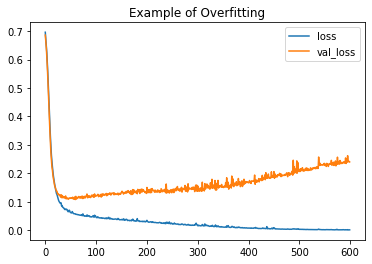

In [31]:
losses.plot()
plt.title('Example of Overfitting')
plt.show()

### Early Stopping

In [49]:
# initialize the model
model2 = Sequential()

# add layers to the model
model2.add(Dense(30, activation='relu'))
model2.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model2.add(Dense(1, activation='sigmoid'))

# compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
# help(EarlyStopping)

In [75]:
# choose min because we want to minimize the loss (or error); for accuracy, use max
early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min', 
                           verbose=1, 
                           patience=20)

In [53]:
model2.fit(x=X_train,y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 34ms/step - loss: 0.6552 - val_loss: 0.6238
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6077 - val_loss: 0.5755
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5586 - val_loss: 0.5195
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5037 - val_loss: 0.4568
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4309 - val_loss: 0.3958
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3946 - val_loss: 0.3443
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3346 - val_loss: 0.3014
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3077 - val_loss: 0.2685
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2569 - val_loss: 0.2422
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2337 - val_loss: 0.2243
Epoch 1

In [54]:
losses2 = pd.DataFrame(model2.history.history)

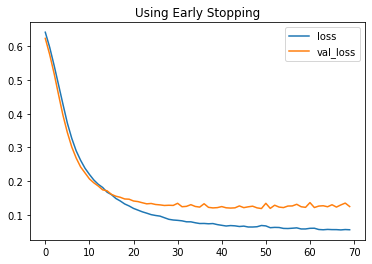

In [55]:
losses2.plot()
plt.title('Using Early Stopping')
plt.show()

### Dropout Layers

In [77]:
# initialize the model
model3 = Sequential()

# input layer
model3.add(Dense(30, activation='relu'))
model3.add(Dropout(0.5))  # common values between 0.2 and 0.5

# hidden layer
model3.add(Dense(15, activation='relu'))
model3.add(Dropout(0.5))  # common values between 0.2 and 0.5

# BINARY CLASSIFICATION (output layer)
model3.add(Dense(1, activation='sigmoid'))

# compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam')

In [78]:
model3.fit(x=X_train,y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 3s 76ms/step - loss: 0.7329 - val_loss: 0.6985
Epoch 2/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6856 - val_loss: 0.6805
Epoch 3/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6756 - val_loss: 0.6702
Epoch 4/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6645 - val_loss: 0.6632
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6682 - val_loss: 0.6505
Epoch 6/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6225 - val_loss: 0.6251
Epoch 7/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6218 - val_loss: 0.5889
Epoch 8/600
14/14 [==============================] - 0s 17ms/step - loss: 0.6072 - val_loss: 0.5512
Epoch 9/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5826 - val_loss: 0.5230
Epoch 10/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5446 - val_loss: 0.4871

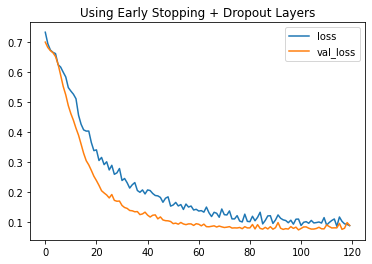

In [79]:
losses3 = pd.DataFrame(model3.history.history)
losses3.plot()
plt.title('Using Early Stopping + Dropout Layers')
plt.show()

In [80]:
# NEW for 2021 using binary classification (predict_classes is deprecated)
y_pred = (model3.predict(X_test) > 0.5).astype("int32")

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [82]:
print(confusion_matrix(y_test, y_pred))

[[54  1]
 [ 2 86]]
